# sklearn-workflow (sklearn)

![](sklearn-workflow.png)

In [1]:
### what we are going to cover:-
cover=['1. An end to end sklearn workflow',
'2. Getting the data ready',
'3. Choose the right estimator/algorithm for our problem',
'4. Fit the model/algorithm and use it to make predictions over our data',
'5. Evaluating the model',
'6. Improve the model',
'7. Save and load the training model',
'8. Putting it all together']

In [2]:
cover

['1. An end to end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithm for our problem',
 '4. Fit the model/algorithm and use it to make predictions over our data',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. Save and load the training model',
 '8. Putting it all together']

## 1. An end-to-end sklearn workflow

In [3]:
# Getting the data ready
import pandas as pd
import numpy as np
heart = pd.read_csv('heart-disease-Copy1.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# create x - Features matrix(input)
x=heart.drop('target',axis=1)
# create y - Labels(output)
y=heart['target']

In [6]:
# choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier # `RandomForestClassifier` -  a classification machine learning model
clf=RandomForestClassifier(n_estimators=100)
# We're going to keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)    #Spliting data from the data sheet

In [8]:
clf.fit(x_train , y_train)

RandomForestClassifier()

In [9]:
# Make a prediction
y_label=clf.predict(x_test)
y_label

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
# Evaluate the model on the training data 
clf.score(x_train,y_train)

1.0

In [11]:
# evaluating the model on the test data
clf.score(x_test,y_test)

0.8032786885245902

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_label))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [13]:
confusion_matrix(y_test, y_label)

array([[19,  6],
       [ 6, 30]], dtype=int64)

In [14]:
accuracy_score(y_test,y_label)

0.8032786885245902

In [15]:
# Improving the model
# try Different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"n_estimators: {i}")
    print(f"Score: {clf.score(x_test,y_test)*100:.2f}% \n")
    


n_estimators: 10
Score: 83.61% 

n_estimators: 20
Score: 81.97% 

n_estimators: 30
Score: 81.97% 

n_estimators: 40
Score: 81.97% 

n_estimators: 50
Score: 83.61% 

n_estimators: 60
Score: 83.61% 

n_estimators: 70
Score: 83.61% 

n_estimators: 80
Score: 81.97% 

n_estimators: 90
Score: 83.61% 



In [16]:
# save the model
import pickle

pickle.dump(clf, open("Random_forest_model(1).pkl","wb"))

In [17]:
# Load the model
loaded_model=pickle.load(open("Random_forest_model(1).pkl","rb"))
loaded_model.score(x_test,y_test)

0.8360655737704918

# Let's go in detail for each of these sections

In [18]:
cover

['1. An end to end sklearn workflow',
 '2. Getting the data ready',
 '3. Choose the right estimator/algorithm for our problem',
 '4. Fit the model/algorithm and use it to make predictions over our data',
 '5. Evaluating the model',
 '6. Improve the model',
 '7. Save and load the training model',
 '8. Putting it all together']

## Getting the data ready
`steps to conquer:-`
1. split the data into training and test(usually 'x' and 'y')
2. filling the missing cells or removing the complete row with missing values
3. converting the non-numerical values into numerical values (also called feature encoding)

In [20]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
x=heart.drop('target',axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y=heart.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2)

In [24]:
xTrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3


In [25]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((242, 13), (61, 13), (242,), (61,))

#### Make sure everything is numerical

In [26]:
car=pd.read_csv("car-sales-extended.csv")
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
car.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

so let's prove that it won't work on non-numerical data

In [28]:
x=car.drop('Price',axis=1)
y=car["Price"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [31]:
reg.fit(x_train,y_train)
# so it cannot work with strings

ValueError: could not convert string to float: 'Toyota'

## How OneHotEncoder Works  

![](OneHotEncoder.png)

In [33]:
# let's sort this out
from sklearn.preprocessing import OneHotEncoder    # makes the non-numerical columns change to numerical ones
from sklearn.compose import ColumnTransformer  # To apply oneHotEncoder to the Columns
cate=['Make','Colour','Doors']
one_hot=OneHotEncoder()
trans = ColumnTransformer([("one_hot",one_hot,cate)],remainder="passthrough") # Remainder is used to spare those columns which are already 
# numerical
trans_x=trans.fit_transform(x)   # we are getting all the things to an array
trans_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [34]:
pd.DataFrame(trans_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# or we can use 
dummies=pd.get_dummies(car[["Make","Colour","Doors"]])
dummies

In [ ]:
# now let's try
x_train,x_test,y_train,y_test=train_test_split(trans_x,y,test_size=0.2)

In [ ]:
reg.fit(x_train,y_train)
reg.score(x_train,y_train)

In [ ]:
reg.score(x_test,y_test)
import matplotlib.pyplot as plt

## How to deal with missing values
1. Fill them with values
2. remove the samples with missing data

In [ ]:
carM=pd.read_csv("car-sales-extended-missing-data.csv")
carM.isna().sum()

In [ ]:
x=carM.drop('Price',axis=1)
y=carM.Price

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cate=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,cate)],remainder="passthrough")
trans_m=transformer.fit_transform(x)
trans_m

__as we can see it handled it but what will you predict with those values as much of it is lost during the process so let's just handle it shall we__

#### 1. Fill missing values values with Pandas


In [ ]:
# we will just write 'missing' in the place of 'NaN'
carM.Make.fillna('missing',inplace = True)
carM.Colour.fillna('missing',inplace=True)
carM['Odometer (KM)'].fillna(carM['Odometer (KM)'].mean(),inplace=True)
carM.Doors.fillna(4,inplace=True)

In [ ]:
carM.isna().sum()

we left `Price` column on purpose as we are `making prediction` of it and don't want any invalid or random data inside our `price` column

In [ ]:
# we will just drop those rows which have empty Price columns
carM.dropna(inplace=True)

In [ ]:
care=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,care)],remainder='passthrough')
trans_m=transformer.fit_transform(carM)
trans_m

In [ ]:
x=carM.drop('Price',axis=1)
y=carM.Price

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(trans_m,y,test_size=0.2)

In [ ]:
reg.fit(xtrain,ytrain)

In [ ]:
reg.score(xtrain,ytrain)

In [ ]:
reg.score(xtest,ytest)

### 2. Filling missing values using sklearn

In [ ]:
carM=pd.read_csv('car-sales-extended-missing-data.csv')
carM.isna().sum()

In [ ]:
carM.dropna(subset=['Price'],inplace=True)

In [ ]:
carM.isna().sum()

In [ ]:
x=carM.drop('Price',axis=1)
y=carM.Price

In [ ]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2)
# we did this split because we don't want any info of the test to be leaked in train

In [ ]:
len(yTrain)

In [ ]:
from sklearn.impute import SimpleImputer  # helps us to fill missing values
from sklearn.compose import ColumnTransformer

#filling non-numerical data with 'missing' and numerical with their mean
cat_impute=SimpleImputer(strategy='constant',fill_value='missing')
door_impute=SimpleImputer(strategy='constant',fill_value=4)
num_impute=SimpleImputer(strategy='mean')

# Define columns
cat_feature=["Make","Colour"]
door_feature=['Doors']
num_feature=['Odometer (KM)']

# filling these values inside the dataframe

imputer=ColumnTransformer([("cat_umpute",cat_impute,cat_feature),("door_impute",door_impute,door_feature),("num_impute",num_impute,num_feature)])
# Transform the data seperately on training and testing data

filled_x_train=imputer.fit_transform(xTrain)
filled_x_test=imputer.fit_transform(xTest)
# view
filled_x_train

In [ ]:
car_train=pd.DataFrame(filled_x_train,columns=['Make','Colour','Doors','Odometer (Km)'])
car_test=pd.DataFrame(filled_x_test,columns=['Make','Colour','Doors','Odometer (Km)'])
# converted into dataframe

In [ ]:
car_train.isna().sum()
# now no empty cells remain

In [ ]:
car_test.isna().sum()

In [ ]:
car_train.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorie=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorie)],remainder='passthrough')
carT_train=transformer.fit_transform(car_train)
carT_test=transformer.fit_transform(car_test)
carT_train.toarray()

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(carT_train,yTrain)
reg.score(carT_test,yTest)

In [ ]:
reg.score(carT_train,yTrain)

In [ ]:
cover

## Choose the right estimator/algorithm for our problem
Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)  
  
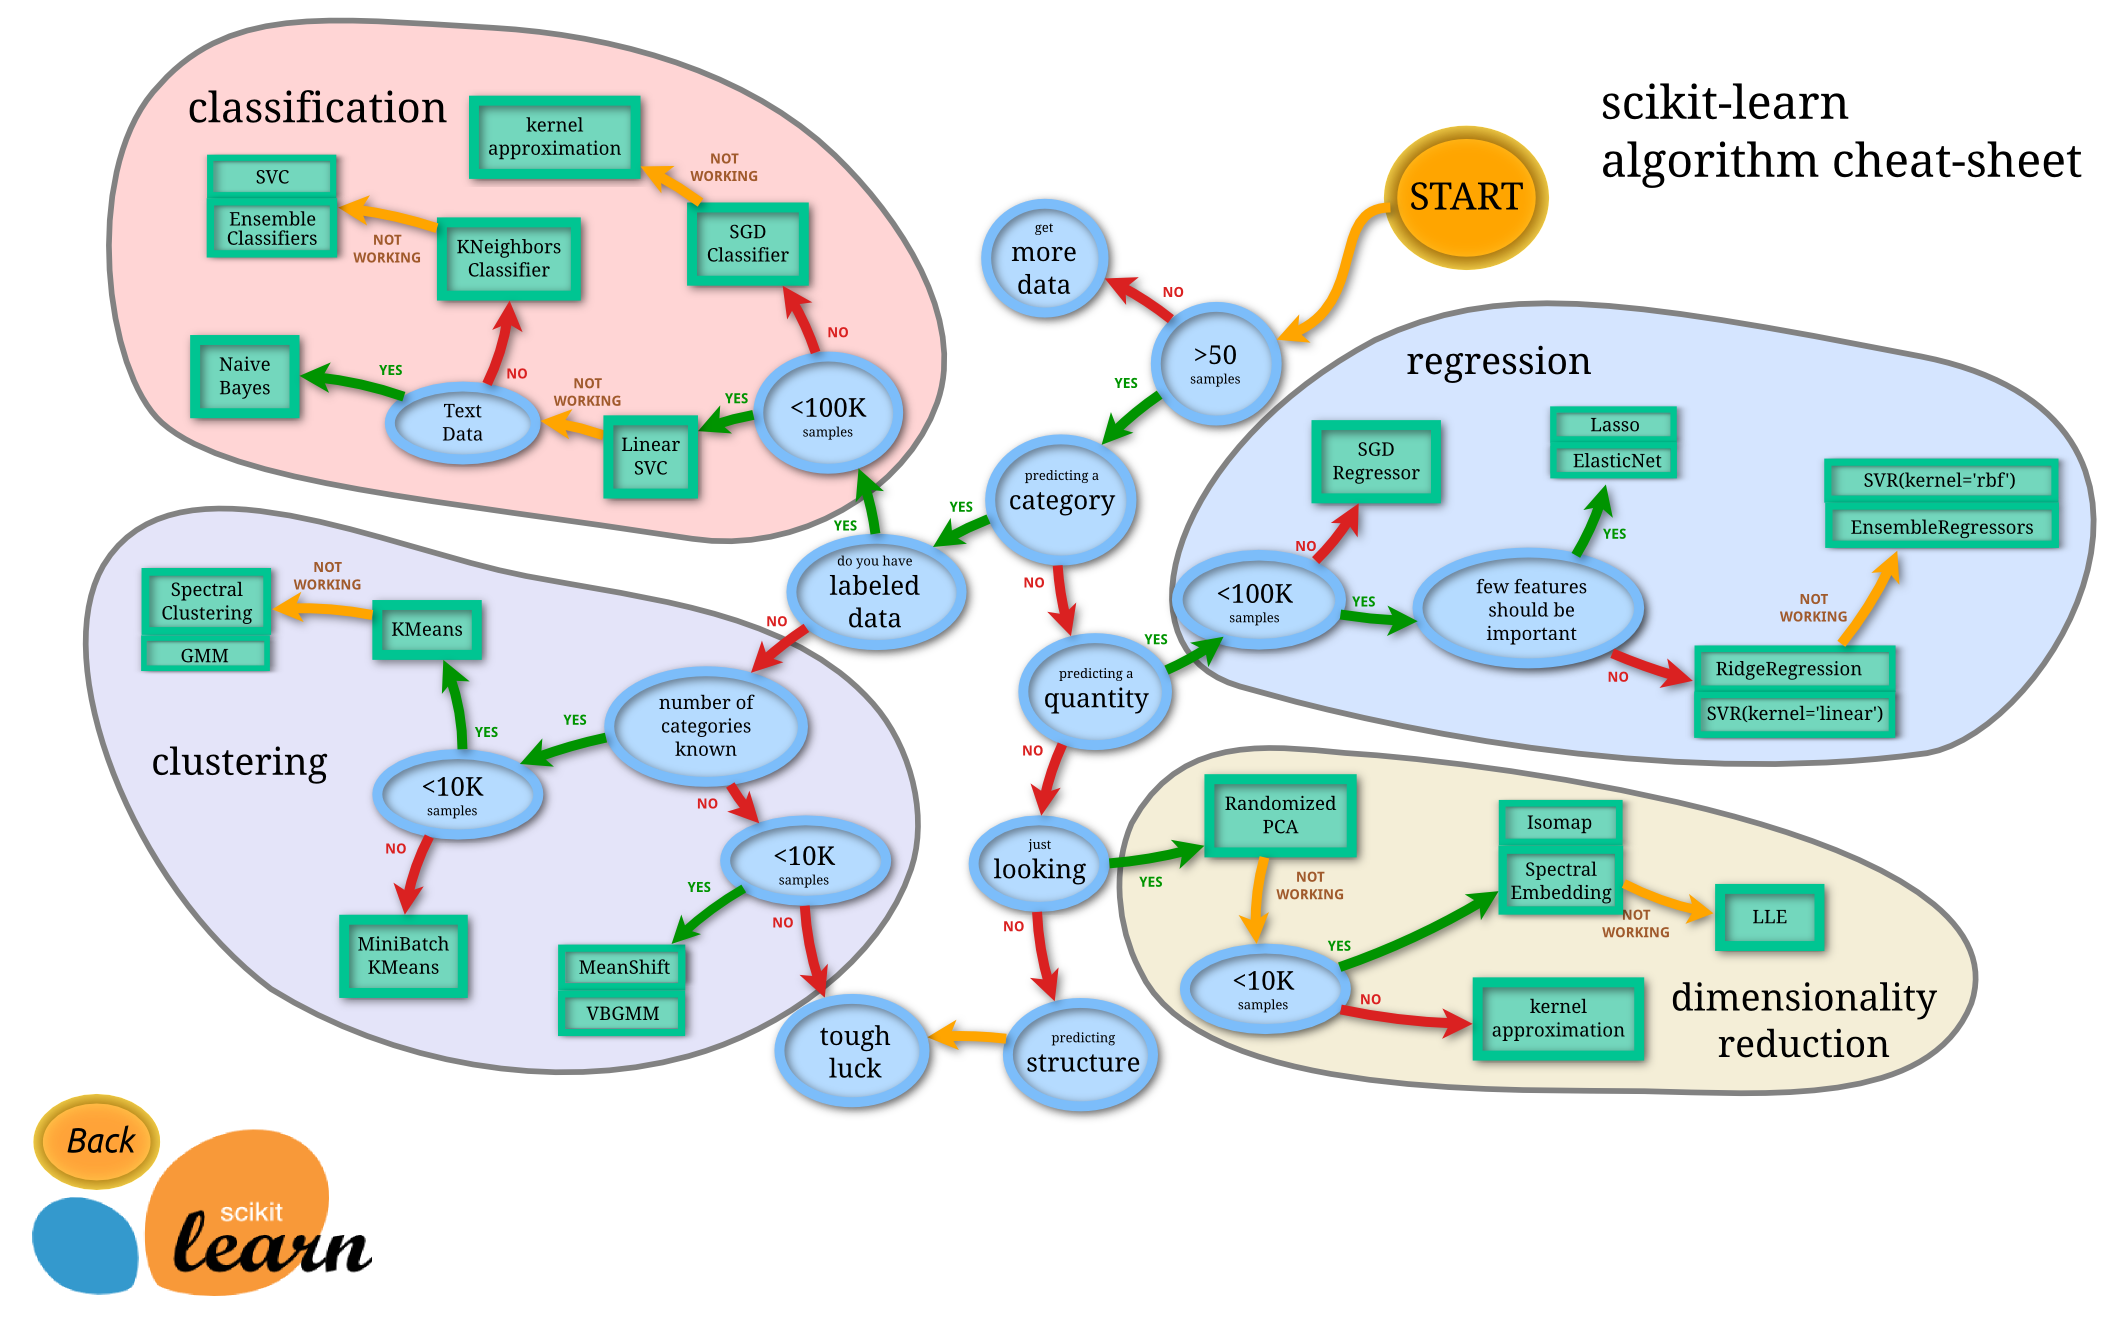

### https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


### Picking a dataset for regression model
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [ ]:
# let's use california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df=pd.DataFrame(housing['data'],columns=housing['feature_names'])

In [ ]:
housing_df.head()

In [ ]:
# let's get the target in the dataframe
housing_df['MedHouseVal']=housing['target']

In [ ]:
housing_df

In [ ]:
x=housing_df.drop('MedHouseVal',axis=1)
y=housing_df['MedHouseVal']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Now let's experiment
### Regression(only)

#### RidgeRegression
from the above table

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)


#### Support vector Regression


In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)
model.score(x_test,y_test)

#### Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)

#### EnsembleRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)
# this is the best choice we have thus we will continue with this

#### picking a machine learning model for a classification problem

In [ ]:
from sklearn.datasets import fetch_covtype
cov = fetch_covtype() 
cov

In [ ]:
covd=pd.DataFrame(cov["data"],columns=cov['feature_names'])
covd

In [ ]:
covd['target']=cov['target']

In [ ]:
covd

In [ ]:
x=covd.drop('target',axis=1)
y=covd.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.kernel_approximation import RBFSampler
rg=RBFSampler()
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
x_features=rg.fit_transform(x_train)
x_test_features=rg.fit_transform(x_test)
model.fit(x_features,y_train)
model.score(x_test_features,y_test)

as we can see this is not expected so we will try a different model

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

a good bump but not enough right!!!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

can you see the huge bump thus we need to experiment with different models and we can do it

#### What to take from this?
* we should use ensemble methods, when we have structured data
* we should use deep learning or transferred learning, when we have unstructured data

## Fit the model/algorithm and use it to make predictions over our data

#### 1. fitting the model to the data

In [ ]:
model.fit(x_train,y_train) 
# this is most important step as we want to get our training data to the machine and it will try to just get those patterns out of the box
model.score(x_test,y_test)
# using this function we get to test the model we just created so here model takes the x_test and predict which is then used to compare it with
# y_test

#### 2. Make predictions using machine learning model

In [ ]:
# used a trained model to make predictions

* There are two ways to do that:
    1. `predict()`
    2. `predict_proba()`


In [ ]:
x=heart.drop('target',axis=1)
y=heart['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
pre=model.predict(x_test)
pre

In [ ]:
np.array(y_test)

In [ ]:
np.mean(pre==y_test)

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test)

so as you can see they are the same thing as they are performing the same task

#### let's see the `predict_proba()`
returns the probabilities of the classification model

In [ ]:
ypred=model.predict_proba(x_test[:5])
ypred

so as you can see here it is giving the probabilities of getting 0 or 1

In [ ]:
ypre=model.predict(x_test[:5])
ypre

#### seeing probability in the regression model

In [ ]:
housing_df

In [ ]:
x=housing_df.drop('MedHouseVal',axis=1)
y=housing_df['MedHouseVal']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
ypre=model.predict(x_test)
ypre

In [ ]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ypre)

In [ ]:
cover

## Evaluating the Machine learning model

There are 3 ways in which we can evaluate our model:-
1. `score()`: estimators built-in method
2. the `scoring` parameters
3. Problem specific `metric`(It is a library) functions  
Link:https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
heart
# using this DataFrame as an example we will evaluate all three ways

#### `score()`
##### `classifier`

In [ ]:
# features and labels
x=heart.drop('target',axis=1)
y=heart['target']

# splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# creation of model instance
model=RandomForestClassifier()

# fitting the model
model.fit(x_train,y_train)

# getting the score
model.score(x_test,y_test)

##### `regression`
same thing as above but with regressor and housing_df dataFrame  
but here the score returns the r^2

#### `scoring` parameter (custom)

In [ ]:
from sklearn.model_selection import cross_val_score

# features and labels
x=heart.drop('target',axis=1)
y=heart['target']

# splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# creation of model instance
model=RandomForestClassifier()

# fitting the model
model.fit(x_train,y_train)

In [ ]:
clf.score(x_test,y_test)

#### cross_val_score()

In [ ]:
cross_val_score(clf,x,y,cv=10)

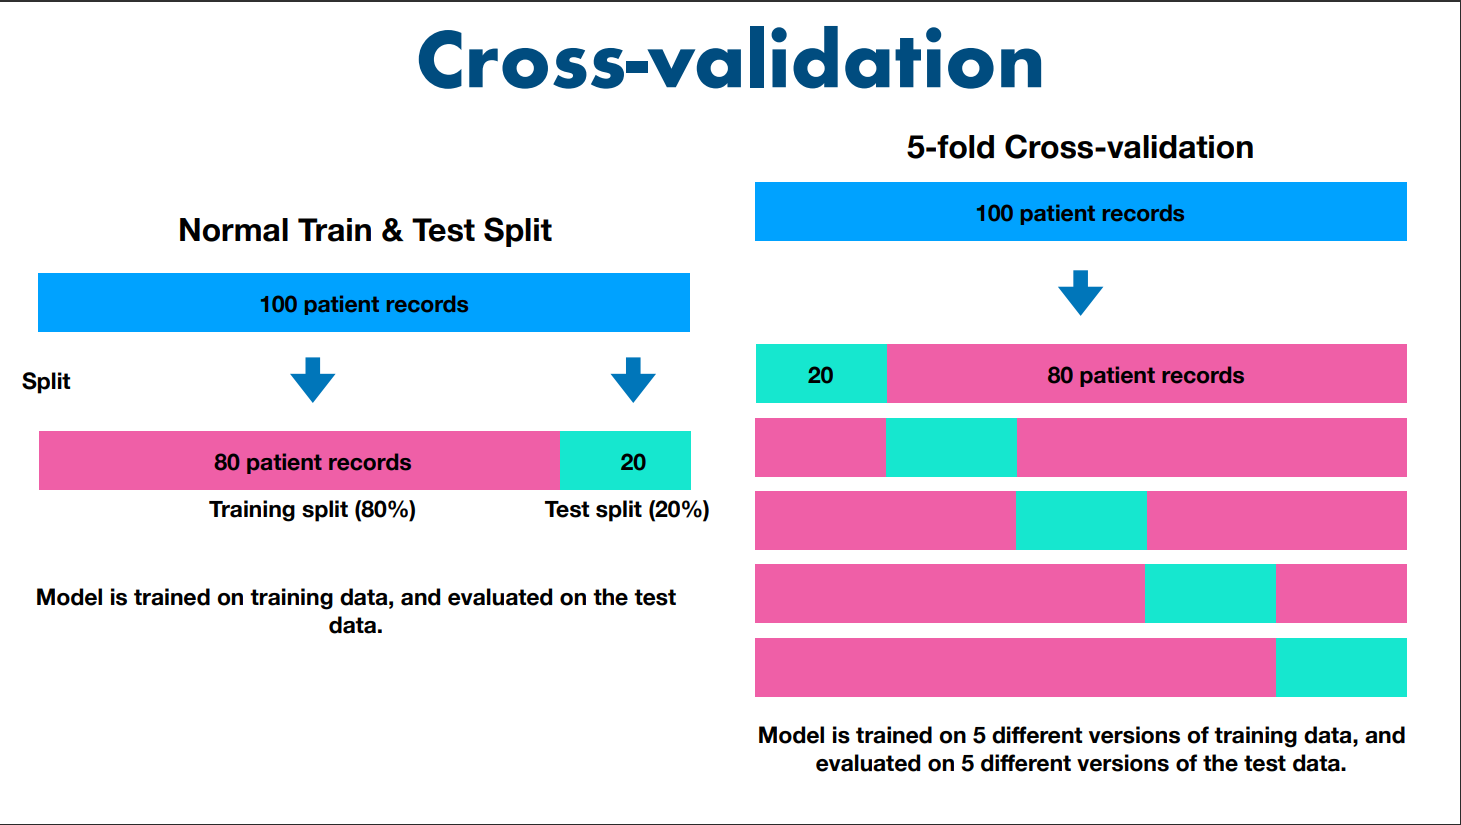

**purpose**:-  
* we can see score on each split one by one
* gives us an opportunity to understand our model better
* helps us to improve our model 

let's compare both

In [ ]:
# single
clf_single = clf.score(x_test,y_test)

# cross_validation
clf_cross = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the 2
clf_single , clf_cross

In [ ]:
# Scoring parameter = None(by Default)
# if the scoring parameter is none then it returns default mean accuracy that is what score returns in that part of the split 
# this means that if we are applying same x_test on score and cross_val we will get the same output


In [ ]:
cover

### Evaluation for classification
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report  

#### Accuracy

In [ ]:
heart.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop('target',axis=1)
y=heart['target']
model = RandomForestClassifier()
cross=cross_val_score(clf,x,y,cv=5)
cross

In [ ]:
np.mean(cross)

In [ ]:
print(f"Heart Disease Classifier cross-validated Accuracy: {np.mean(cross)*100:.2f}%")

#### Area under the receiving operating curve
also called :-  
* AUC(AREA UNDER CURVE)
* ROC CURVE  

* `definition`: The comparison between model true positive rate vs the model false positive rate
    * True positive = model predicts 1 when truth is 1
    * False positive = model predicts 1 when truth is 0
    * True negative = model predicts 0 when truth is 0
    * False negative = model predicts 0 when truth is 1

In [ ]:
from sklearn.metrics import roc_curve
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
# make predictions with probabilities
y_pre=model.predict_proba(x_test)

y_pre[:10],len(y_pre)

In [ ]:
positive=y_pre[:,1]
positive[:10]

In [ ]:
# calculate fpr, tpr and thresholds 
fpr,tpr, threshold = roc_curve(y_test,positive)

In [ ]:
# check the false positives
fpr

In [ ]:
# check the true positives
tpr

In [ ]:
# check the thresholds
threshold

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
def roc_curve_plot(fpr,tpr):
    plt.plot(fpr,tpr,color='black',label='ROC')
    plt.title('ROC_CURVE')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot([0,0,1],[0,1,1],linestyle='--',color='blue',label='perfect')
    plt.legend(title='Parameter')
    plt.show()
roc_curve_plot(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,positive)

#### Confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix
ypre = model.predict(x_test)
confusion_matrix(y_test,ypre)

##### Visualization using pandas' `crosstab`

In [ ]:
pd.crosstab(y_test,ypre,rownames=['actual labels'],colnames=['predicted labels'])

In [ ]:
len(y_test)

##### Visualization using Seaborn's heatmap()

In [ ]:
# import it
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# confusion matrix variable
conf=confusion_matrix(y_test,ypre)

# plot
sns.heatmap(conf)

In [ ]:
# we can also use a function inside sklearn.metrics for its visualization
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=ypre)

#### Classification report

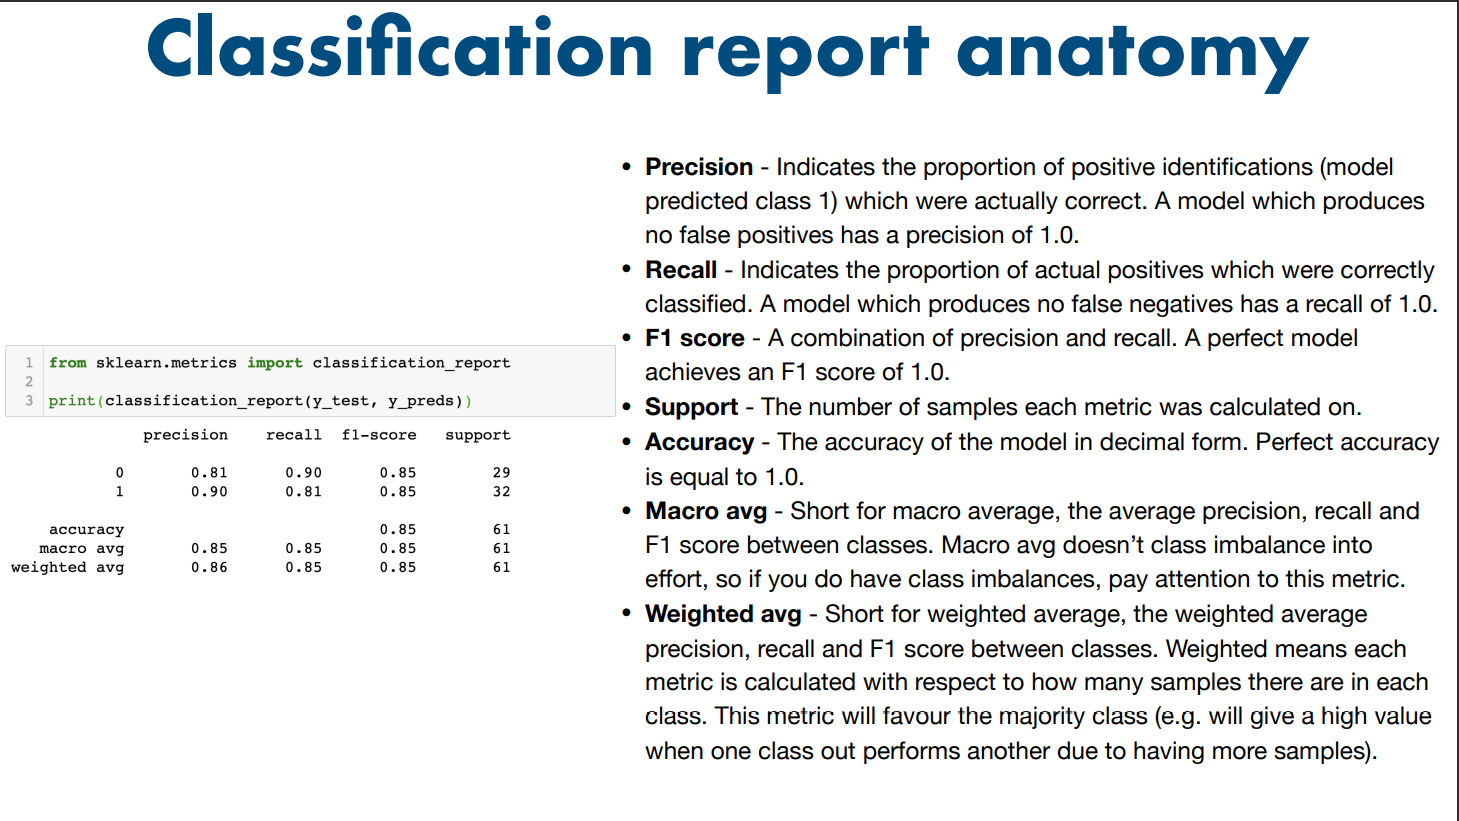

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypre))

In [ ]:
pd.DataFrame(classification_report(y_test,ypre,output_dict=True,zero_division=0))# as a dataFrame

### Now for `Regression` metrics
link: -  https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics  
The ones we're going to cover are:

* R^2 (pronounced r-squared) or coefficient of determination
* Mean absolute error (MAE)
* Mean squared error (MSE)

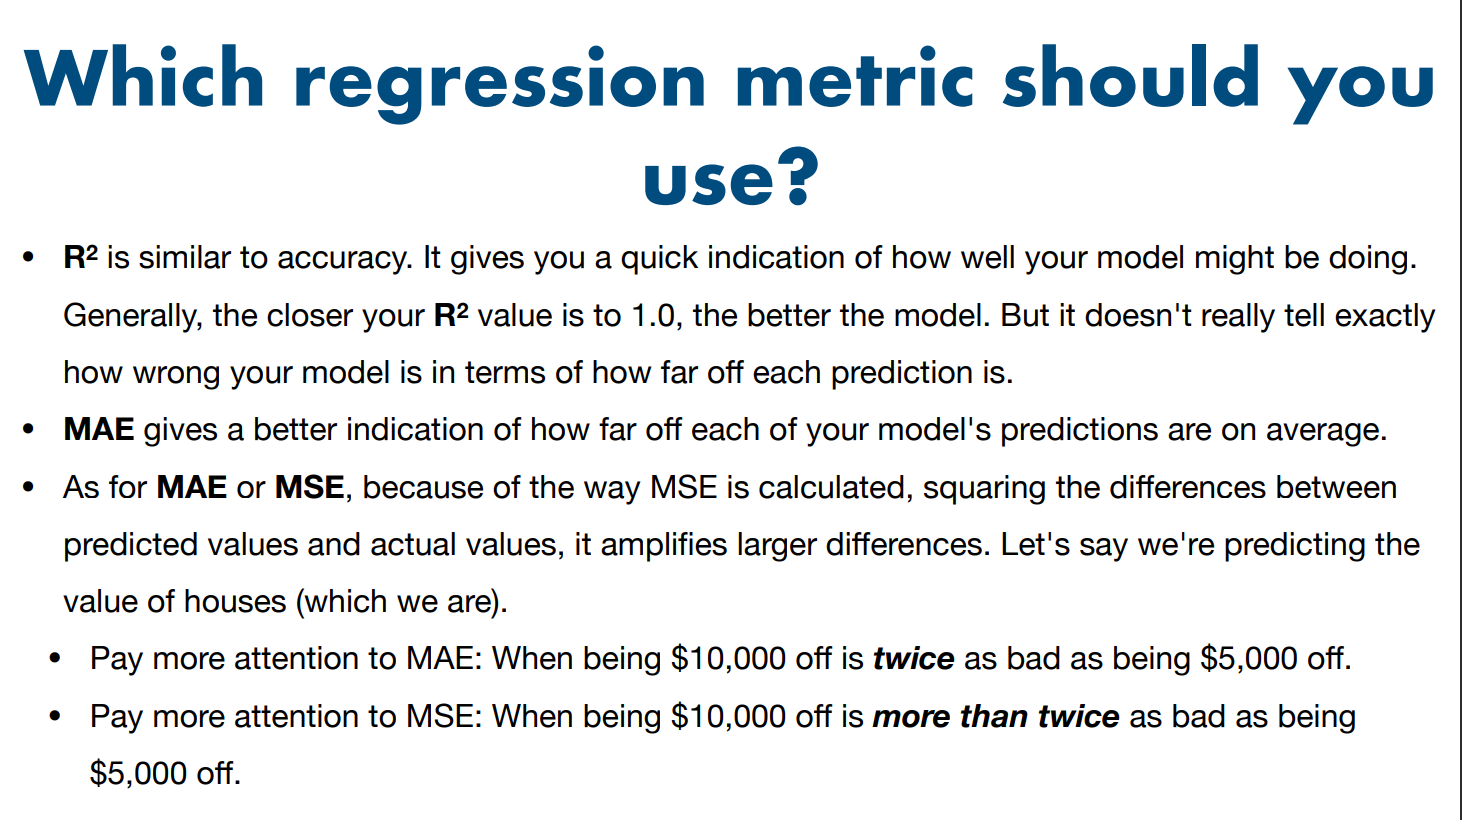

In [ ]:
housing_df.rename(columns={'MedHouseVal':'target'},inplace = True)

In [ ]:
housing_df # we will use this for this section

In [ ]:
#features 
x=housing_df.drop('target',axis=1)
# label
y=housing_df['target']
# train-test-split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# model import
model=RandomForestRegressor()
# model fit
model.fit(x_train,y_train)

In [ ]:
# score
model.score(x_test,y_test)

In [ ]:
y_test

#### R^2

In [ ]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [ ]:
y_test_mean

In [ ]:
# just showing if the prediction of the model is the mean of the test data then it r2_score == 0.0
r2_score(y_true=y_test,y_pred=y_test_mean)

In [ ]:
# if same then r2_score ==1.0
r2_score(y_true=y_test,y_pred=y_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
r2_score(y_true=y_test,y_pred=y_pred)

which is same as score()

#### mean_absolute_error

In [ ]:
from sklearn.metrics import mean_absolute_error
# lower the better

In [ ]:
# for pred having mean as elements
mean_absolute_error(y_true=y_test,y_pred=y_test_mean)

In [ ]:
# for same 
mean_absolute_error(y_true=y_test,y_pred=y_test)

In [ ]:
# for true
mean_absolute_error(y_true=y_test,y_pred=y_pred)

#### mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#for pred having mean as elements
mean_squared_error(y_test,y_test_mean)

In [ ]:
#for same
mean_squared_error(y_test,y_test)

In [ ]:
# for true
mean_squared_error(y_test,y_pred)

#### Finally using the `scoring parameter`

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
heart

In [ ]:
# features
x=heart.drop('target',axis=1)
# label
y=heart['target']

In [ ]:
# model selection
model=RandomForestClassifier()

In [ ]:
# using cross val
np.random.seed(42)
cr_score=cross_val_score(model,x,y,scoring=None)
cr_score

In [ ]:
print(f'The cross validated is: {np.mean(cr_score)*100:.2f}%')

##### let's change the scoring parameter

In [ ]:
np.random.seed(42)
cr_acc = cross_val_score(model,x,y,scoring='accuracy')
cr_acc

In [ ]:
print(f'The cross validated acc is: {np.mean(cr_acc)*100:.2f}%')

In [ ]:
np.random.seed(42)
cr_pre = cross_val_score(model,x,y,scoring='precision')
cr_pre

In [ ]:
print(f'The cross validated precision is: {np.mean(cr_pre)*100:.2f}%')

In [ ]:
np.random.seed(42)
cr_rec=cross_val_score(model,x,y,scoring='recall')
cr_rec

In [ ]:
print(f'The cross validated recall is: {np.mean(cr_rec)*100:.2f}%')

### Scoring parameter for Regression

In [ ]:
housing_df

In [ ]:
# feature
x=housing_df.drop('target',axis=1)
# label
y=housing_df['target']

In [ ]:
model=RandomForestRegressor()

In [ ]:
np.random.seed(0)
cr_none=cross_val_score(model,x,y,cv=5,scoring=None)
cr_none

In [ ]:
print(f'The cross_val_score without scoring parameter: {np.mean(cr_none) *100:.2f}%')

In [ ]:
np.random.seed(0)
cr_abs=cross_val_score(model,x,y,cv=5,scoring='neg_mean_absolute_error')
cr_abs

In [ ]:
print(f'The cross_val_score with mean_absolute_error has an accuracy of: {np.mean(cr_abs)*100:.2f}')

In [ ]:
np.random.seed(0)
cr_sqr=cross_val_score(model,x,y,cv=5,scoring='neg_mean_squared_error')
cr_sqr

In [ ]:
print(f'The cross_val_score with mean_squared_error has an accuracy of: {np.mean(cr_sqr)*100:.2f}')

### Using different evaluation metrics as sklearn Functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

#### For Classifier

In [ ]:
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [ ]:
heart

In [ ]:
# features
x=heart.drop('target',axis=1)
# labels
y=heart.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
# recall_score
recall_score(y_test,y_pred)

In [ ]:
# accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
# f1_score
f1_score(y_test,y_pred)

In [ ]:
# precision_score
precision_score(y_test,y_pred)

### For Regressor

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
housing_df.head()

In [ ]:
# features 
x=housing_df.drop('target',axis=1)
# labels
y=housing_df.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
# mean_absolute_error
mean_absolute_error(y_test,y_pred)

In [ ]:
# mean_squared_error
mean_squared_error(y_test,y_pred)

In [ ]:
# r2_score
r2_score(y_test,y_pred)

## Improving the Model
First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?  

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?  

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns  

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomizedSearchCV
3. Exhaustively with GridSearchCV

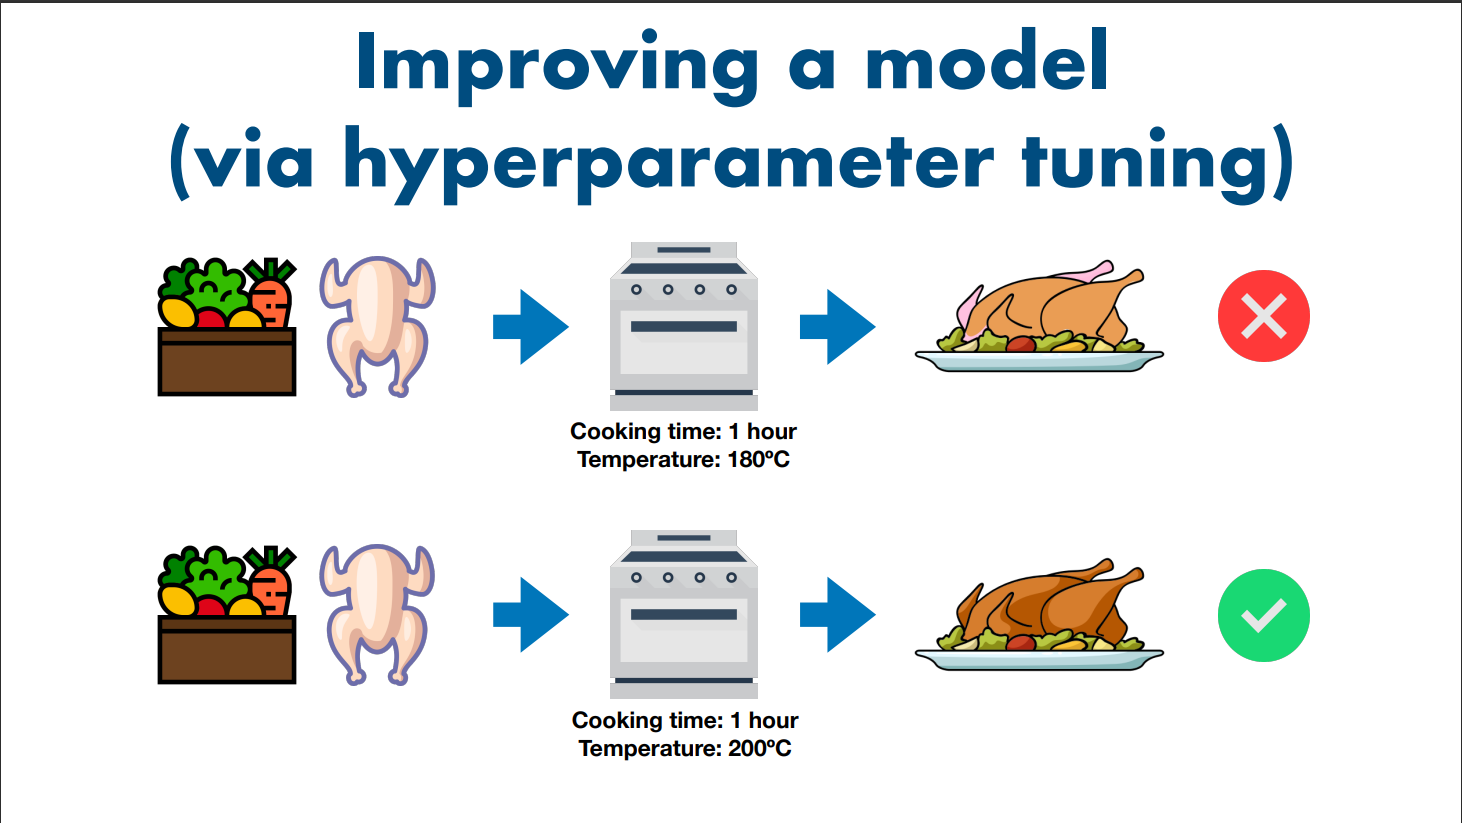

### 1. Tuning Hyperparameters by hand

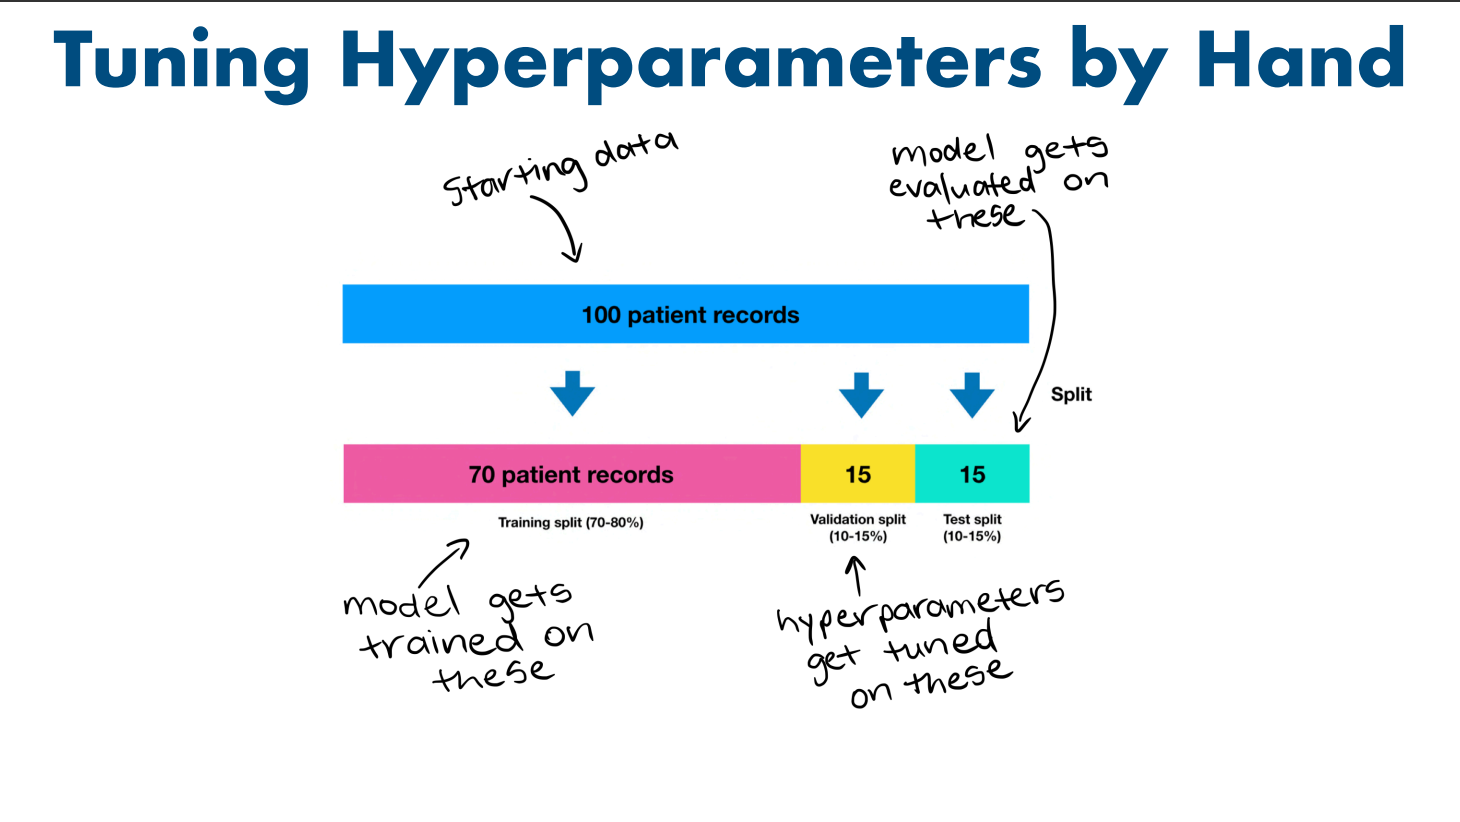

let's make three sets:-  
1. Training
2. Validation
3. Test

In [ ]:
model=RandomForestClassifier()
model.get_params()

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [ ]:
adjust=['max_depth',
'max_features',
'min_samples_leaf',
'min_samples_split',
'n_estimators']

In [ ]:
def eval_mod(y_test,y_pred):
    """just give the dict to me"""
    acc=accuracy_score(y_test,y_pred)
    pre=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    score = {'accuracy score':round(acc,2),'precision score':round(pre,2),'f1 score':round(f1,2),'recall score':round(recall,2)}
    print(f"Acc: {acc * 100:.2f}%")
    print(f"Precision: {pre:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return score

In [ ]:
x=heart.drop('target',axis=1)
y=heart.target

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [ ]:
# train,validate split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=(15/85))

In [ ]:
model.fit(x_train,y_train)

now we will only evaluate the model on the validation split

In [ ]:
y_pred=model.predict(x_val)

In [ ]:
base=eval_mod(y_val,y_pred)

In [ ]:
#let's go for some change by adjusting hyperparameters
model2=RandomForestClassifier(n_estimators=1000)
model2.fit(x_train,y_train)

In [ ]:
y_pred2=model2.predict(x_val)

In [ ]:
n_est=eval_mod(y_val,y_pred2)

In [ ]:
model.get_params()

In [ ]:
adjust

In [ ]:
model3=RandomForestClassifier(n_estimators=100,max_depth=10)

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
depth=eval_mod(y_val,model.predict(x_val))

### Hyperparameters using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
adjust

In [ ]:
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
model=RandomForestClassifier(n_jobs=1)
rs=RandomizedSearchCV(estimator=model,n_iter=10,cv=5,verbose=2,param_distributions=grid)
rs

In [ ]:
rs.fit(x_train,y_train)

In [ ]:
rs.best_params_

In [ ]:
y_pred=rs.predict(x_val)

In [ ]:
rs_eval=eval_mod(y_val,y_pred)

### Hyperparameters tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ngrid = {"n_estimators": [10, 100, 200],
        "max_depth": [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1,2]}

In [ ]:
gs=GridSearchCV(estimator = model,param_grid=ngrid,cv=5,verbose=3,n_jobs=1)

In [ ]:
gs.fit(x_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
y_preds=gs.predict(x_val)

In [ ]:
gs_eval=eval_mod(y_val,y_pred)

In [ ]:
compare = pd.DataFrame({'baseline':base,
                       'n_est_tun':n_est,
                       'random Search': rs_eval,
                       'grid Search': gs_eval})
compare.plot.bar(figsize=(10,15))

# Saving the Model

## pickle

In [ ]:
import pickle
# save an existing model to file
pickle.dump(gs,open("gs_RandomForest.pkl","wb"))

In [ ]:
loaded=pickle.load(open('gs_RandomForest.pkl','rb'))

In [ ]:
eval_mod(y_val,loaded.predict(x_val))

## joblib module

In [ ]:
from joblib import dump,load
dump(gs,filename='gs_random_forest.joblib')

In [ ]:
loaded=load(filename='gs_random_forest.joblib')

In [ ]:
eval_mod(y_val,loaded.predict(x_val))

In [ ]:
cover

# Putting it all together

In [ ]:
carM = pd.read_csv('car-sales-extended-missing-data.csv')

In [ ]:
carM.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# random seed
import numpy as np
np.random.seed(0)

# import data and take charge of the missing values
carM = pd.read_csv('car-sales-extended-missing-data.csv')
carM.dropna(subset=["Price"],inplace=True)

# split into validate and test
x=carM.drop('Price',axis=1)
y=carM['Price']
x_rest,x_test,y_rest,y_test=train_test_split(x,y,test_size=0.15)
x_train,x_val,y_train,y_val=train_test_split(x_rest,y_rest,test_size=(15/85))
# define different features
categorie = ['Make','Colour']
cate_trans=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

catenum = ['Doors']
catenum_trans=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])

numerical = ['Odometer (KM)']
numerical_trans = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])

# transformers
colTrans = ColumnTransformer(transformers=[('cat',cate_trans,categorie),
                                           ('door',catenum_trans,catenum),
                                           ('numerical',numerical_trans,numerical)])
# model
model=Pipeline(steps=[('preprocessor',colTrans),('model',RandomForestRegressor())])

#fit
model.fit(x_train,y_train)
model.score(x_val,y_val)

In [ ]:
adjust

In [ ]:
RandomForestRegressor()

In [ ]:
ngrid={
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]}

In [ ]:
gs=GridSearchCV(estimator=model,param_grid=ngrid,cv=5,n_jobs=1,verbose=2)
gs.fit(x_train,y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.score(x_val,y_val)